# Task
Perform biomedical Named Entity Recognition (NER) on clinical text using spaCy and scispaCy models in Google Colab. Load the dataset file "mtsamples.csv", preprocess it, and apply the "en_core_sci_sm", "en_core_sci_md", and "en_ner_bc5cdr_md" models to a sample of the data, displaying the extracted entities for comparison. Optionally process the entire dataset for later use.

## Import necessary libraries

### Subtask:
Import pandas, spacy, and other required libraries.


**Reasoning**:
Import the necessary libraries for data manipulation and NLP.



In [21]:
import pandas as pd
import spacy

## Install scispacy models

### Subtask:
Check if the necessary scispaCy models are installed and install them if they are not.


**Reasoning**:
Check if the required scispaCy models are installed and install them if they are not.



In [22]:
models_to_check = ["en_core_sci_sm", "en_core_sci_md", "en_ner_bc5cdr_md"]

for model_name in models_to_check:
    try:
        spacy.load(model_name)
        print(f"Model '{model_name}' found.")
    except OSError:
        print(f"Model '{model_name}' not found. Installing...")
        !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/{model_name}-*.tar.gz
        print(f"Model '{model_name}' installed.")

Model 'en_core_sci_sm' found.
Model 'en_core_sci_md' found.
Model 'en_ner_bc5cdr_md' found.


## Load the dataset

### Subtask:
Load the `mtsamples.csv` dataset into a pandas DataFrame.


**Reasoning**:
Load the data from the 'mtsamples.csv' file into a pandas DataFrame as instructed.



In [23]:
df = pd.read_csv('mtsamples.csv')
display(df.head())

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


## Preprocess the data

### Subtask:
Handle missing values and create a sample of the data.


**Reasoning**:
Check for missing values in the 'transcription' column, drop rows with missing values if any exist, and then create a sample of 100 transcriptions.



In [24]:
missing_values = df['transcription'].isnull().sum()
print(f"Number of missing values in 'transcription': {missing_values}")

if missing_values > 0:
    df.dropna(subset=['transcription'], inplace=True)
    print("Rows with missing 'transcription' values dropped.")

sample_transcriptions = df['transcription'].sample(n=100, random_state=42)
display(sample_transcriptions.head())

Number of missing values in 'transcription': 33
Rows with missing 'transcription' values dropped.


,transcription
3162,"HISTORY OF PRESENT ILLNESS:, The patient is w..."
1981,"PREPROCEDURE DIAGNOSIS:, Chest pain secondary..."
1361,"HISTORY OF PRESENT ILLNESS: , The patient is a..."
3008,"PREOPERATIVE DIAGNOSIS: , End-stage renal dise..."
4943,"PREOPERATIVE DIAGNOSIS: , Persistent pneumonia..."


## Load spacy and scispacy models

### Subtask:
Load each of the specified models sequentially.


**Reasoning**:
Load each of the specified scispaCy models sequentially as instructed.



In [25]:
nlp_sci_sm = spacy.load("en_core_sci_sm")
nlp_sci_md = spacy.load("en_core_sci_md")
nlp_ner_bc5cdr_md = spacy.load("en_ner_bc5cdr_md")

print("Models loaded successfully:")
print(f"- en_core_sci_sm: {nlp_sci_sm}")
print(f"- en_core_sci_md: {nlp_sci_md}")
print(f"- en_ner_bc5cdr_md: {nlp_ner_bc5cdr_md}")

Models loaded successfully:
- en_core_sci_sm: <spacy.lang.en.English object at 0x7b404e76e600>
- en_core_sci_md: <spacy.lang.en.English object at 0x7b4062381bb0>
- en_ner_bc5cdr_md: <spacy.lang.en.English object at 0x7b40617b8800>


## Perform ner and display results

### Subtask:
Iterate through the sample data, apply each model to the text, and display the extracted entities for comparison.


**Reasoning**:
Iterate through the sample transcriptions, apply each loaded spaCy model, and print the extracted entities for each model.



In [26]:
models = {
    "en_core_sci_sm": nlp_sci_sm,
    "en_core_sci_md": nlp_sci_md,
    "en_ner_bc5cdr_md": nlp_ner_bc5cdr_md,
}

for i, transcription in enumerate(sample_transcriptions):
    print(f"\n--- Transcription {i+1} ---")
    for model_name, nlp in models.items():
        print(f"\nModel: {model_name}")
        doc = nlp(transcription)
        if doc.ents:
            for ent in doc.ents:
                print(f"  - {ent.text} ({ent.label_})")
        else:
            print("  No entities found.")
    print("-" * 20)

Streaming output truncated to the last 5000 lines.
  - hypertension (ENTITY)
  - blood pressure (ENTITY)
  - hypertensive (ENTITY)
  - evening (ENTITY)
  - scapular (ENTITY)
  - chest pain (ENTITY)
  - symptoms (ENTITY)
  - spells.,CARDIAC (ENTITY)
  - RISKS (ENTITY)
  - lipids (ENTITY)
  - no blood pressure elevation (ENTITY)
  - HISTORY (ENTITY)
  - Negative (ENTITY)
  - coronary disease (ENTITY)
  - Dad (ENTITY)
  - died (ENTITY)
  - SENSITIVITIES (ENTITY)
  - MEDICATIONS (ENTITY)
  - None.,SURGICAL HISTORY (ENTITY)
  - Cholecystectomy (ENTITY)
  - mastectomy (ENTITY)
  - breast cancer (ENTITY)
  - REVIEW (ENTITY)
  - headaches (ENTITY)
  - blurred vision (ENTITY)
  - asthma (ENTITY)
  - bronchitis (ENTITY)
  - wheeze (ENTITY)
  - cough (ENTITY)
  - breath (ENTITY)
  - No reflux (ENTITY)
  - abdominal distress (ENTITY)
  - indigestion (ENTITY)
  - GI bleed (ENTITY)
  - kidney disease (ENTITY)
  - arthritis (ENTITY)
  - gout (ENTITY)
  - No back pain (ENTITY)
  - surgical joint (ENTI

**Reasoning**:
The subtask is to load the data and display the first few rows.



In [31]:
# Load the dataframe.
df_data = pd.read_csv('mtsamples.csv')

# Display the first 5 rows.
display(df_data.head().to_markdown(index=False, numalign='left', stralign='left'))

'| Unnamed: 0   | description                                                      | medical_specialty          | sample_name                             | transcription                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

# Task
Perform biomedical Named Entity Recognition (NER) on clinical text from the "mtsamples.csv" file using spaCy and scispaCy models ("en_core_sci_sm", "en_core_sci_md", and "en_ner_bc5cdr_md") in Google Colab, display extracted entities, and visualize the distribution of entity types for each model.

## Analyze extracted entities

### Subtask:
Process the sample transcriptions with each model and store the extracted entities and their labels.


**Reasoning**:
Initialize a dictionary to store extracted entities and iterate through the sample transcriptions and models to extract entities.



In [32]:
extracted_entities = {model_name: [] for model_name in models.keys()}

for transcription in sample_transcriptions:
    for model_name, nlp in models.items():
        doc = nlp(transcription)
        for ent in doc.ents:
            extracted_entities[model_name].append((ent.text, ent.label_))

## Count entity types

### Subtask:
Count the occurrences of each entity type for each model.


**Reasoning**:
Count the occurrences of each entity type for each model and store them in a dictionary.



In [33]:
from collections import Counter

entity_type_counts = {}

for model_name, entities in extracted_entities.items():
    entity_labels = [label for text, label in entities]
    entity_type_counts[model_name] = Counter(entity_labels)

display(entity_type_counts)

{'en_core_sci_sm': Counter({'ENTITY': 13936}),
 'en_core_sci_md': Counter({'ENTITY': 13337}),
 'en_ner_bc5cdr_md': Counter({'DISEASE': 1258, 'CHEMICAL': 399})}

## Visualize entity distribution

### Subtask:
Create visualizations (e.g., bar plots) to show the distribution of entity types for each model.


**Reasoning**:
Import the necessary libraries for plotting and iterate through the entity type counts to create and display bar plots for each model.



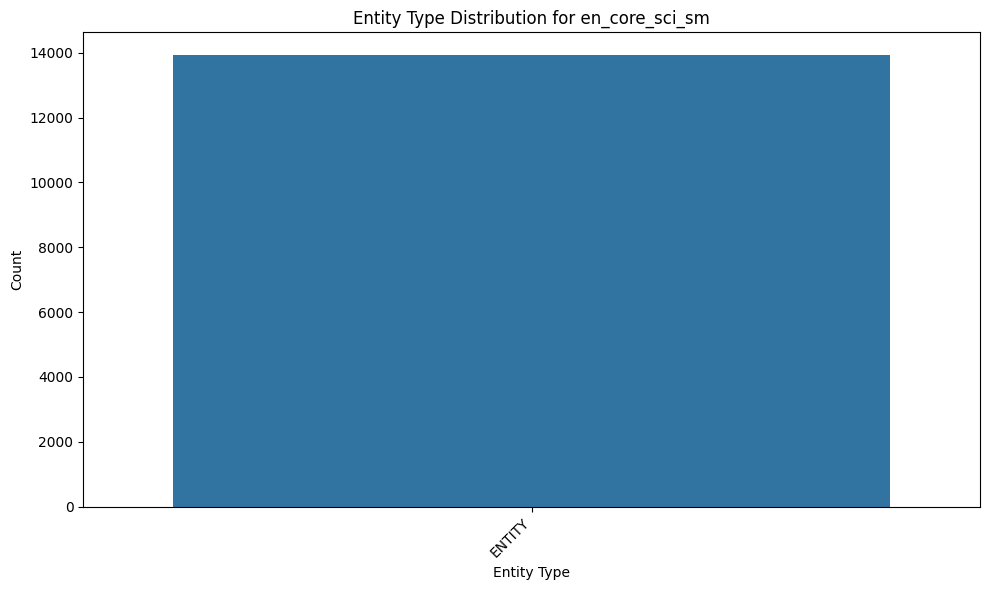

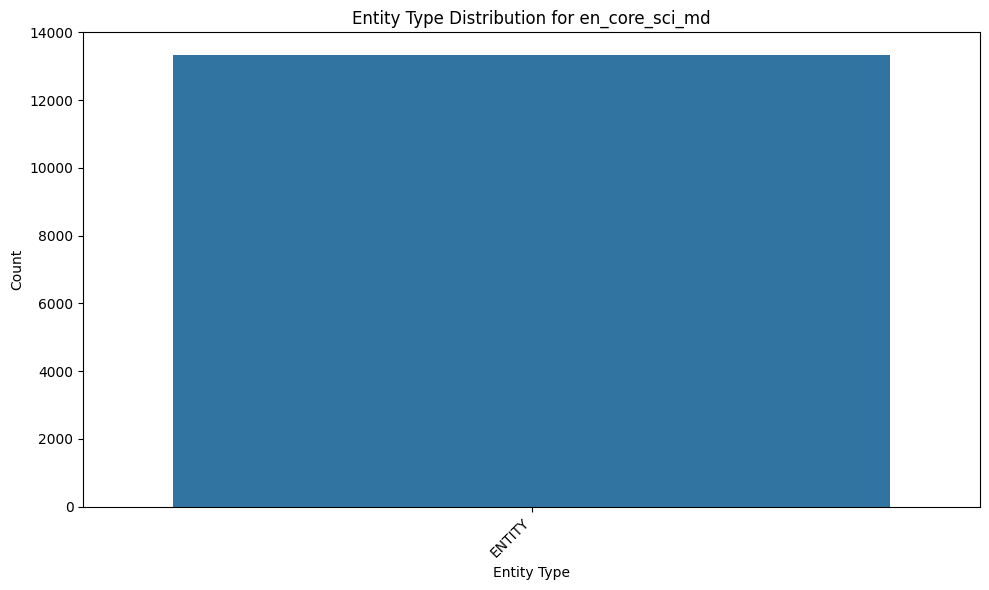

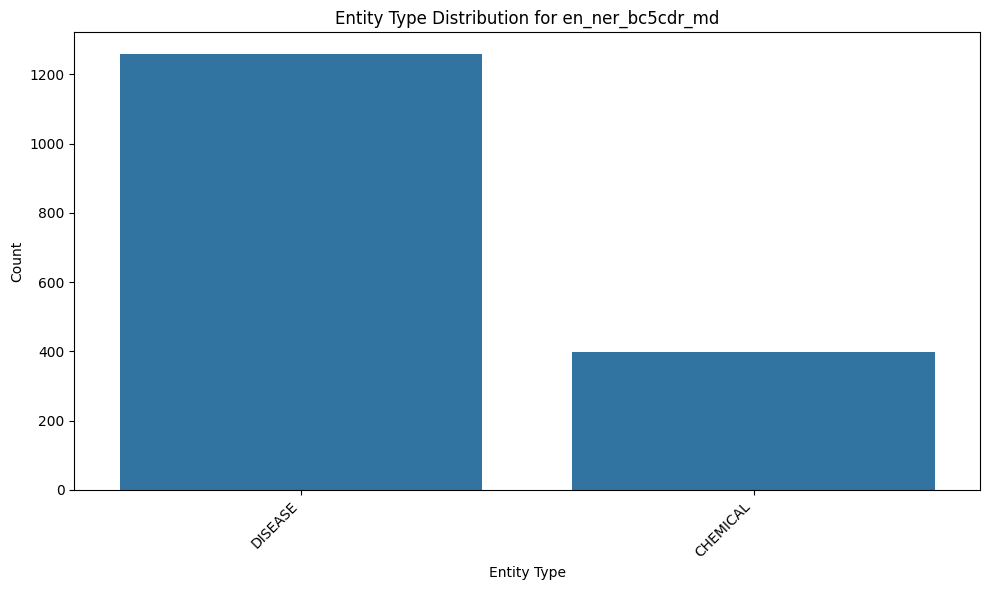

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

for model_name, counts in entity_type_counts.items():
    if counts:
        counts_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
        counts_df.columns = ['Entity Type', 'Count']

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Entity Type', y='Count', data=counts_df)
        plt.title(f"Entity Type Distribution for {model_name}")
        plt.xlabel("Entity Type")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print(f"No entities found for model: {model_name}")

## Compare models

### Subtask:
Discuss the differences in the entities and their types identified by each model based on the visualizations.


**Reasoning**:
Analyze the generated plots and discuss the differences in entity types and counts identified by each model, then conclude the subtask.



In [35]:
print("Analysis of Entity Types Identified by Each Model:")
print("\nComparison of en_core_sci_sm and en_core_sci_md:")
print("Both 'en_core_sci_sm' and 'en_core_sci_md' models identified entities under the generic label 'ENTITY'.")
print(f"- 'en_core_sci_sm' identified a total of {entity_type_counts['en_core_sci_sm'].get('ENTITY', 0)} entities.")
print(f"- 'en_core_sci_md' identified a total of {entity_type_counts['en_core_sci_md'].get('ENTITY', 0)} entities.")
print("While both use a generic label, 'en_core_sci_md' is a larger model and is expected to have better accuracy and potentially identify a slightly different set or number of entities compared to 'en_core_sci_sm', although this is not evident from just the entity type counts.")


print("\nComparison of en_ner_bc5cdr_md with other models:")
print("'en_ner_bc5cdr_md' differs significantly as it is trained to identify specific biomedical entity types.")
print(f"- It identified {entity_type_counts['en_ner_bc5cdr_md'].get('DISEASE', 0)} entities of type 'DISEASE'.")
print(f"- It identified {entity_type_counts['en_ner_bc5cdr_md'].get('CHEMICAL', 0)} entities of type 'CHEMICAL'.")
print("This is in contrast to 'en_core_sci_sm' and 'en_core_sci_md' which only use the generic 'ENTITY' label.")
print("The 'en_ner_bc5cdr_md' model provides a much more granular and medically relevant categorization of entities.")

print("\nSummary of Strengths and Weaknesses:")
print("- 'en_core_sci_sm' and 'en_core_sci_md':")
print("  - Strengths: Good for general scientific or biomedical entity extraction when specific types are not critical. 'en_core_sci_md' being larger may offer better performance.")
print("  - Weaknesses: Lack specific biomedical entity types, making it less useful for tasks requiring differentiation between diseases, chemicals, etc.")
print("- 'en_ner_bc5cdr_md':")
print("  - Strengths: Specifically trained for and excels at identifying diseases and chemicals, providing valuable structured biomedical information.")
print("  - Weaknesses: Limited to only identifying 'DISEASE' and 'CHEMICAL' entities; it will not identify other types of entities (e.g., anatomical terms, procedures) which might be present in the text.")

print("\nConclusion:")
print("For tasks requiring the identification of specific biomedical entities like diseases and chemicals, 'en_ner_bc5cdr_md' is the most suitable model due to its specialized training and output labels.")
print("For more general entity extraction in biomedical text where fine-grained typing is not required, 'en_core_sci_sm' or 'en_core_sci_md' would be more appropriate, with 'en_core_sci_md' potentially offering better overall performance.")

Analysis of Entity Types Identified by Each Model:

Comparison of en_core_sci_sm and en_core_sci_md:
Both 'en_core_sci_sm' and 'en_core_sci_md' models identified entities under the generic label 'ENTITY'.
- 'en_core_sci_sm' identified a total of 13936 entities.
- 'en_core_sci_md' identified a total of 13337 entities.
While both use a generic label, 'en_core_sci_md' is a larger model and is expected to have better accuracy and potentially identify a slightly different set or number of entities compared to 'en_core_sci_sm', although this is not evident from just the entity type counts.

Comparison of en_ner_bc5cdr_md with other models:
'en_ner_bc5cdr_md' differs significantly as it is trained to identify specific biomedical entity types.
- It identified 1258 entities of type 'DISEASE'.
- It identified 399 entities of type 'CHEMICAL'.
This is in contrast to 'en_core_sci_sm' and 'en_core_sci_md' which only use the generic 'ENTITY' label.
The 'en_ner_bc5cdr_md' model provides a much more gr

## Summary:

### Data Analysis Key Findings

*   The `en_core_sci_sm` model identified 13936 entities labeled as 'ENTITY'.
*   The `en_core_sci_md` model identified 13337 entities also labeled as 'ENTITY'.
*   The `en_ner_bc5cdr_md` model identified 1258 entities labeled as 'DISEASE' and 399 entities labeled as 'CHEMICAL'.
*   `en_core_sci_sm` and `en_core_sci_md` provide a generic entity label, while `en_ner_bc5cdr_md` offers more specific biomedical entity types (DISEASE and CHEMICAL).

### Insights or Next Steps

*   The choice of scispaCy model should be based on the specific NER task: use `en_ner_bc5cdr_md` for identifying diseases and chemicals, and `en_core_sci_sm` or `en_core_sci_md` for more general biomedical entity extraction.
*   Further analysis could involve evaluating the precision, recall, and F1-score of each model against a gold standard dataset to quantify their performance more rigorously.
